In [1]:
import numpy as np

In [2]:
def f(t, s_max=512):
    return s_max * np.sin(t * np.pi / 2)**2

In [3]:
x = np.linspace(0, 1, 100)
plt.plot(x, f(x))
f(x).max()

NameError: name 'plt' is not defined

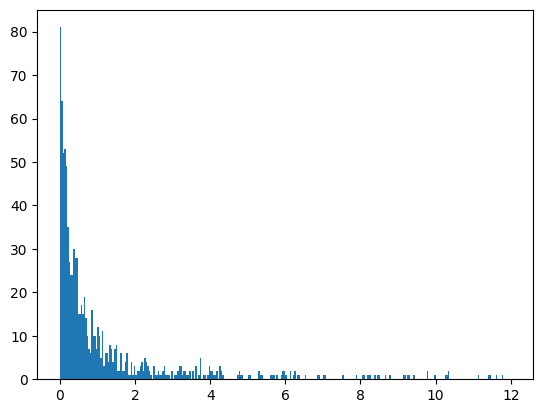

In [ ]:
def sample_distance():
    # sample a random distance
    start = np.random.rand()
    end = np.random.rand()
    d = abs(f(start) - f(end))
    return d

# plot histogram of distances
import matplotlib.pyplot as plt
distances = [sample_distance() for _ in range(1000)]
plt.hist(distances, bins=300, range=(0,12))
plt.show()

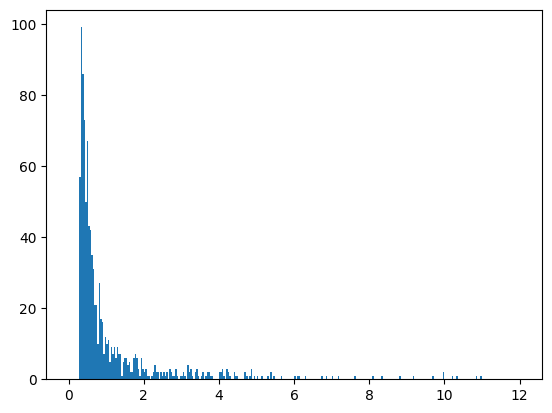

In [ ]:
# plot histogram
starts = [f(np.random.rand()) for _ in range(1000)]
plt.hist(starts, bins=300, range=(0,12))
plt.show()

In [ ]:
min(distances), max(distances)

(0.00023382976281294265, 386.12679670323894)

In [ ]:
def f(x):
    return x / (1 -x)

In [ ]:
%load_ext autoreload
%autoreload 2
# imports
import os
from pathlib import Path
import logging
import numpy as np
import matplotlib.pyplot as plt
from scripts import losses
from scripts import sampling
from model_code import utils as mutils
from model_code.ema import ExponentialMovingAverage
from scripts import datasets
import torch
import wandb
from torch.utils import tensorboard
from scripts import utils
from absl import app
from absl import flags
from ml_collections.config_flags import config_flags
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
# get config
from configs.afhq.img_size_64 import get_config
config = get_config()
# Get the forward process definition
scales = config.model.blur_schedule
heat_forward_module = mutils.create_forward_process_from_sigmas(
    config, scales, config.device)
torch.set_default_dtype(torch.float64)
# load data
# Build data iterators
trainloader, testloader = datasets.get_dataset(
    config, uniform_dequantization=config.data.uniform_dequantization)
train_iter = iter(trainloader)
eval_iter = iter(testloader)
eval_batch = next(eval_iter)[0].to(config.device).float()

In [ ]:
f(np.linspace(0, 1, 100))

/var/folders/5s/h912v31x5gj935j3y2b1s3040000gn/T/ipykernel_27664/1663961325.py:2: RuntimeWarning: divide by zero encountered in divide
  return x / (1 -x)


array([0.00000000e+00, 1.02040816e-02, 2.06185567e-02, 3.12500000e-02,
       4.21052632e-02, 5.31914894e-02, 6.45161290e-02, 7.60869565e-02,
       8.79120879e-02, 1.00000000e-01, 1.12359551e-01, 1.25000000e-01,
       1.37931034e-01, 1.51162791e-01, 1.64705882e-01, 1.78571429e-01,
       1.92771084e-01, 2.07317073e-01, 2.22222222e-01, 2.37500000e-01,
       2.53164557e-01, 2.69230769e-01, 2.85714286e-01, 3.02631579e-01,
       3.20000000e-01, 3.37837838e-01, 3.56164384e-01, 3.75000000e-01,
       3.94366197e-01, 4.14285714e-01, 4.34782609e-01, 4.55882353e-01,
       4.77611940e-01, 5.00000000e-01, 5.23076923e-01, 5.46875000e-01,
       5.71428571e-01, 5.96774194e-01, 6.22950820e-01, 6.50000000e-01,
       6.77966102e-01, 7.06896552e-01, 7.36842105e-01, 7.67857143e-01,
       8.00000000e-01, 8.33333333e-01, 8.67924528e-01, 9.03846154e-01,
       9.41176471e-01, 9.80000000e-01, 1.02040816e+00, 1.06250000e+00,
       1.10638298e+00, 1.15217391e+00, 1.20000000e+00, 1.25000000e+00,
      

In [ ]:
import ipywidgets as widgets
import numpy as np

import matplotlib.pyplot as plt

def f(x, a=1, b=1, c=1, d=1):
    return c * (x**d / (1 - x)**a)**b

# Define the range of x values
x = np.linspace(0, 0.9999, 100)

# Create the interactive slider widgets for parameters a and b
a_slider = widgets.FloatSlider(value=1, min=0, max=10, step=0.1, description='a')
b_slider = widgets.FloatSlider(value=1, min=0, max=10, step=0.1, description='b')
c_slider = widgets.FloatSlider(value=1, min=0, max=10, step=0.1, description='c')
d_slider = widgets.FloatSlider(value=1, min=0, max=10, step=0.1, description='d')

# Define the update function for the plot
def update_plot(a, b, c, d):
    y = f(x, a, b, c, d)
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.ylim(0, 10)
    plt.title('Plot of f(x) for x from 0 to 1')
    plt.grid(True)
    plt.show()

# Create the interactive output widget
output = widgets.interactive_output(update_plot, {'a': a_slider, 'b': b_slider, 'c': c_slider, 'd': d_slider})

# Display the sliders and the plot
widgets.VBox([a_slider, b_slider, c_slider, d_slider, output])

In [ ]:
f(0.99, 2, 1)

9899.999999999982